<a href="https://colab.research.google.com/github/SDB016/Baekjoon-Solution/blob/master/Class/Class3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1003

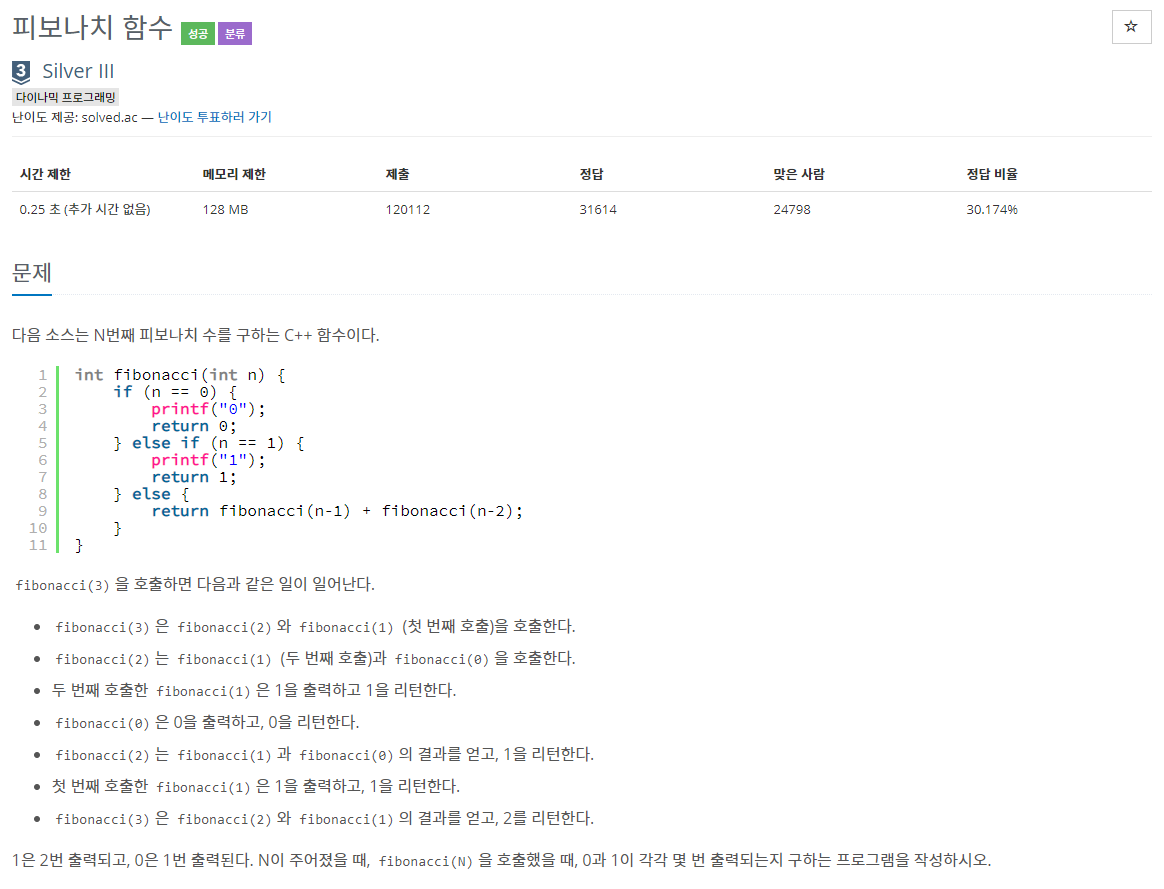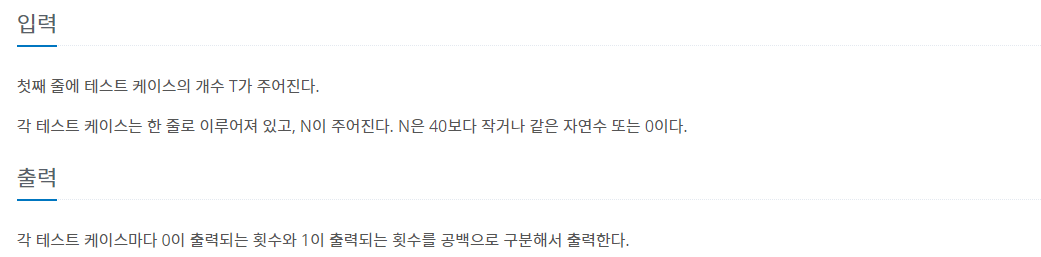

In [ ]:
import sys
input = sys.stdin.readline
dp = [[1,0],[0,1]]
for i in range(2, 41):
  dp.append([dp[i-2][0]+dp[i-1][0],dp[i-2][1]+dp[i-1][1]])
for _ in range(int(input())):
  a,b = dp[int(input())]
  print(a, b)

# 1012

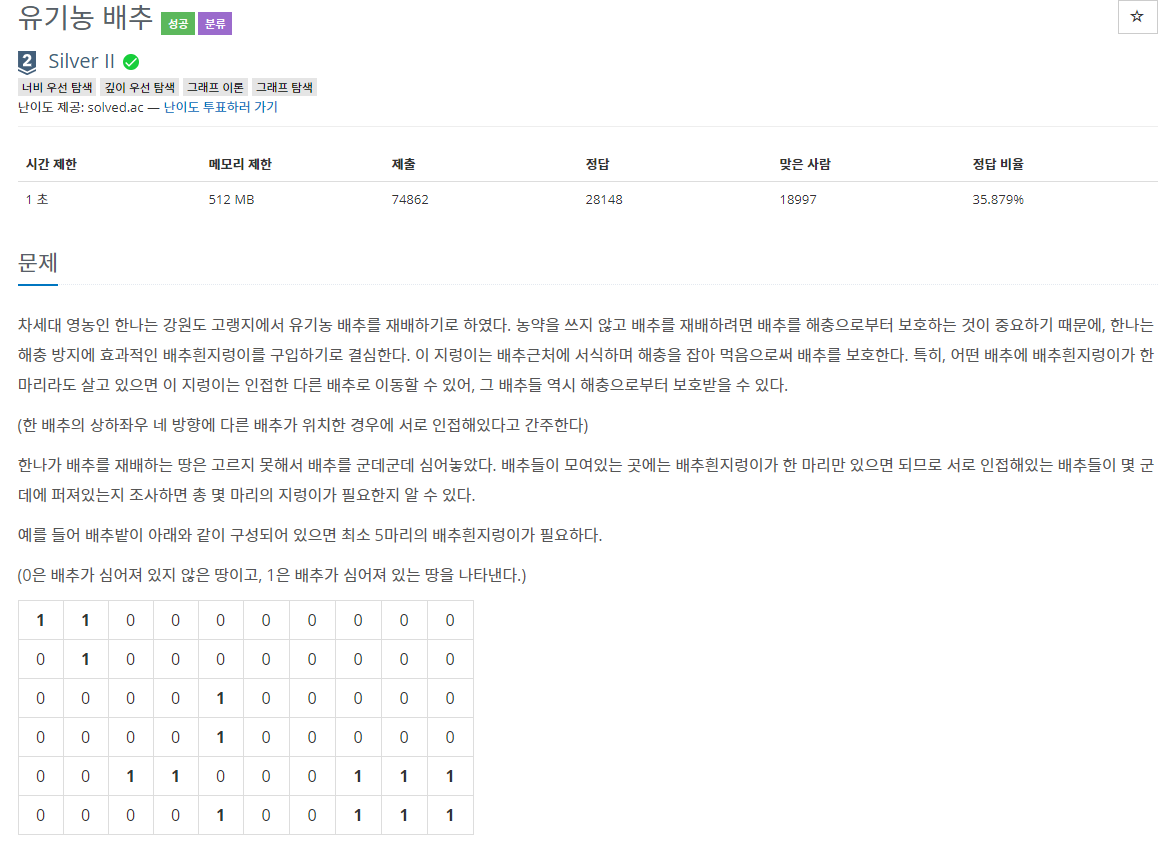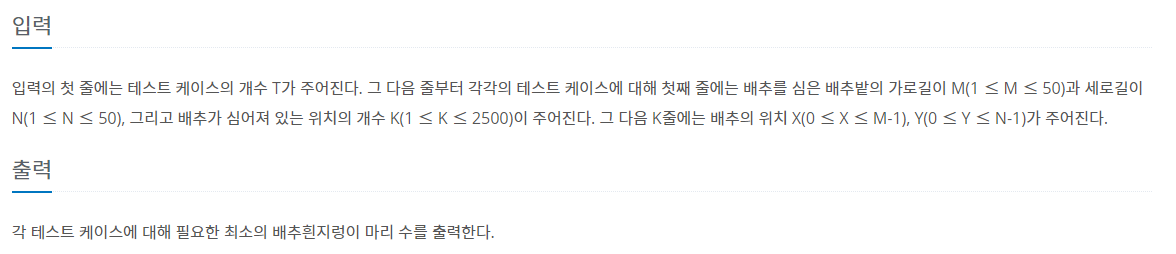

In [ ]:
import sys
from collections import deque
input = sys.stdin.readline

move = [[0,1],[1,0],[-1,0],[0,-1]]

def bfs(x,y):
  q = deque([(x,y)])
  while q:
    x,y = q.popleft()
    graph[x][y] = 2
    for i in range(4):
      nx, ny = x+move[i][0], y+move[i][1]
      if 0<=nx<n and 0<=ny<m and graph[nx][ny] == 1:
        q.append((nx,ny))
        graph[nx][ny] = 2  # 큐에 넣을 때 표시를 해주지 않으면 큐에 넣었는데도 중복해서 추가될 수 있으므로 시간초과가 난다.
        
  
for _ in range(int(input())):
  m, n, k = map(int, input().split()) 
  cnt = 0
  graph = [[0] * m for _ in range(n)]
  for _ in range(k):
    x, y = map(int, input().split())
    graph[y][x] = 1
  
  for i in range(n):
    for j in range(m):
      if graph[i][j] == 1:
        cnt += 1
        bfs(i,j)
  print(cnt)

##DFS, BFS 비교

###**문제 유형별 선택**
###1) 그래프의 모든 정점을 방문하는 것이 주요한 문제
어느 것을 사용해도 **상관 없음**
###2) 경로의 특징을 저장해둬야 하는 문제
ex) 각 정점에 숫자가 적혀있고 a부터 b까지 가는 경로를 구하는데 경로에 같은 숫자가 있으면 안되는 문제 등, 각각의 경로마다 특징을 저장해둬야 할때  
**DFS**
###3) 최단거리 구해야 하는 문제
ex)미로 찾기 등 최단거리를 구해야 할 경우  
**BFS**
###4) 검색 대상 그래프가 큰 문제
**DFS**
###5) 그래프가 크지 않고 검색 시작 지점으로부터 우너하는 대상이 멀지 않은 문제
**BFS**

# 1074

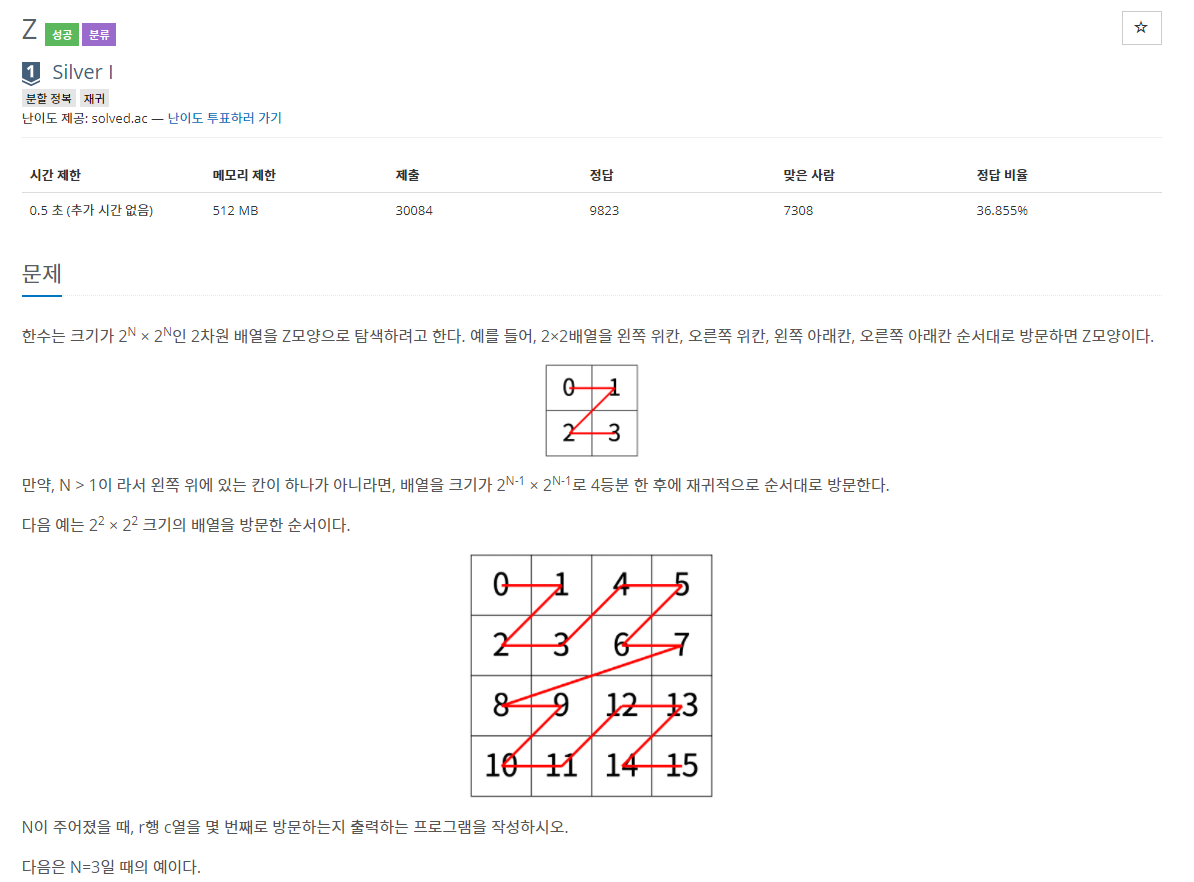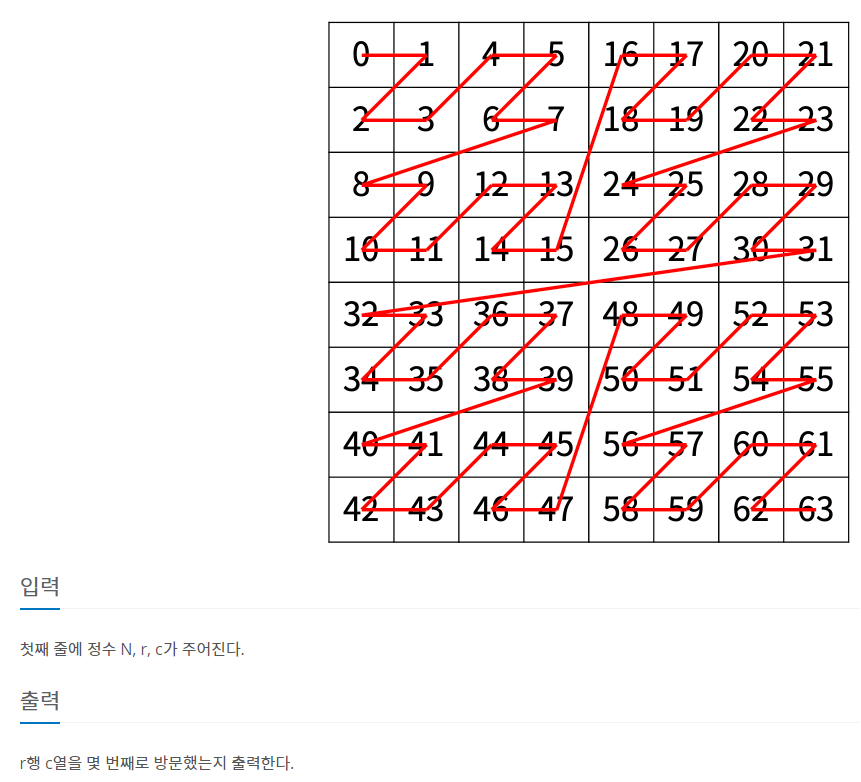

In [ ]:
n,y,x = map(int, input().split())
area = []
x_start,y_start = 0, 0

while n >= 1:
  r = 2**(n-1)
  if x < x_start + r:
    if y < y_start + r:
      area.append(0)
    else:
      y_start += r
      area.append(2)
  else:
    x_start += r
    if y < y_start + r:
      area.append(1)
    else:
      y_start += r
      area.append(3)
  n -= 1
res = 0
for i in range(len(area)):
  res += 4**i * area[-i-1]
print(res)

한칸이 될 때 까지 0, 1, 2, 3분면으로 나눈다. 그리고 4의 제곱을 곱해준 값을 더한다.

    ex) 3 7 7 => 3사분면, 3시분면, 3사분면 => 
    
    4^2 X 3 + 4^1 X 3 + 4^0 X 3 = 16 X 3 + 4 X 3 + 1 X 3 

    = 48 + 12 + 3 = 63

# 1107

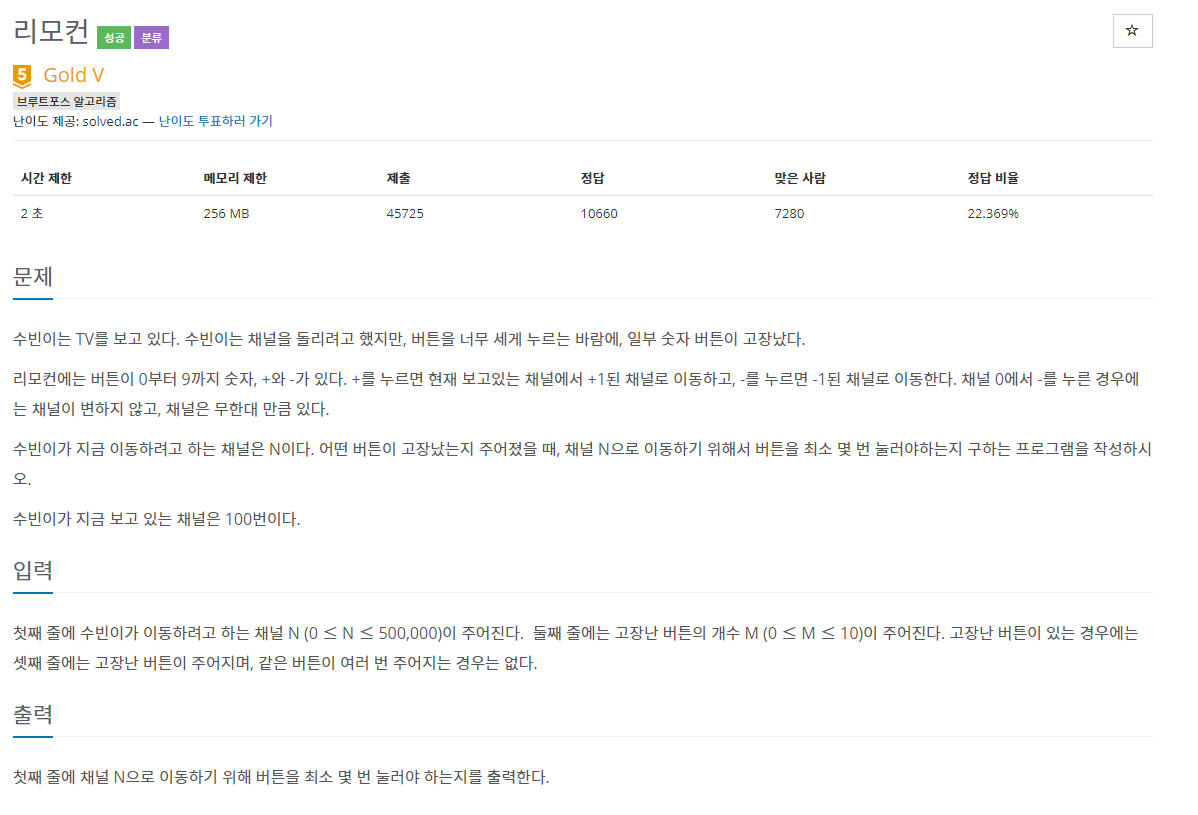

In [ ]:
des = int(input())
m = int(input())
broken = []
if m == 0:
  broken = set()
else:
  broken = set(list(input().split()))
_min = abs(des-100)

for num in range(1000001):
  num = str(num)
  for i in range(len(num)):
    if num[i] in broken:
      break
    elif i == len(num) - 1:
      _min = min(_min, abs(int(num)-des)+len(num))
print(_min)

# 1260

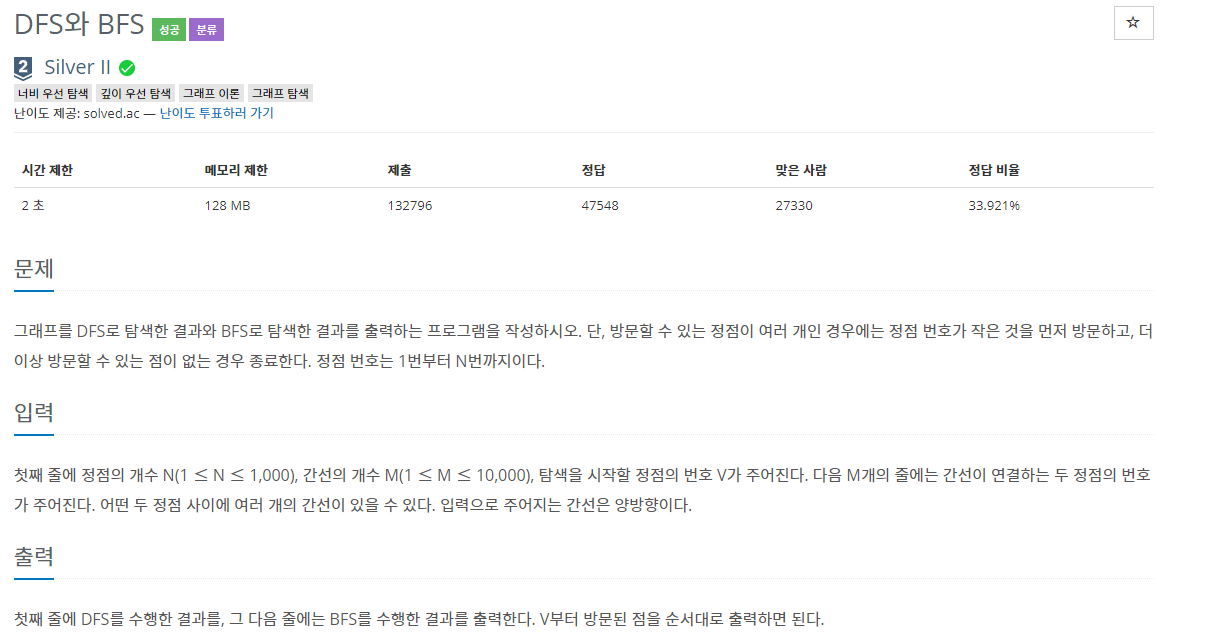

In [ ]:
from collections import deque
import sys
input = sys.stdin.readline

def dfs(start):
  visit[start] = True
  print(start, end=' ')
  for i in con[start]:
    if not visit[i]:
      dfs(i)
      
def bfs(start):
  visit[start] = True
  q = deque([start])
  while q:
    node = q.popleft()
    print(node, end=' ')
    for i in con[node]:
      if not visit[i]:
        q.append(i)
        visit[i] = True

n,m,v = map(int, input().split())
visit = [False]*(n+1)
con = [[] for _ in range(n+1)]
for _ in range(m):
  s, f = map(int, input().split())
  con[s].append(f)
  con[f].append(s)
for i in con:
  i.sort()

dfs(v)
print()
visit = [False]*(n+1)
bfs(v)

# 1389 (플로이드-워셜)

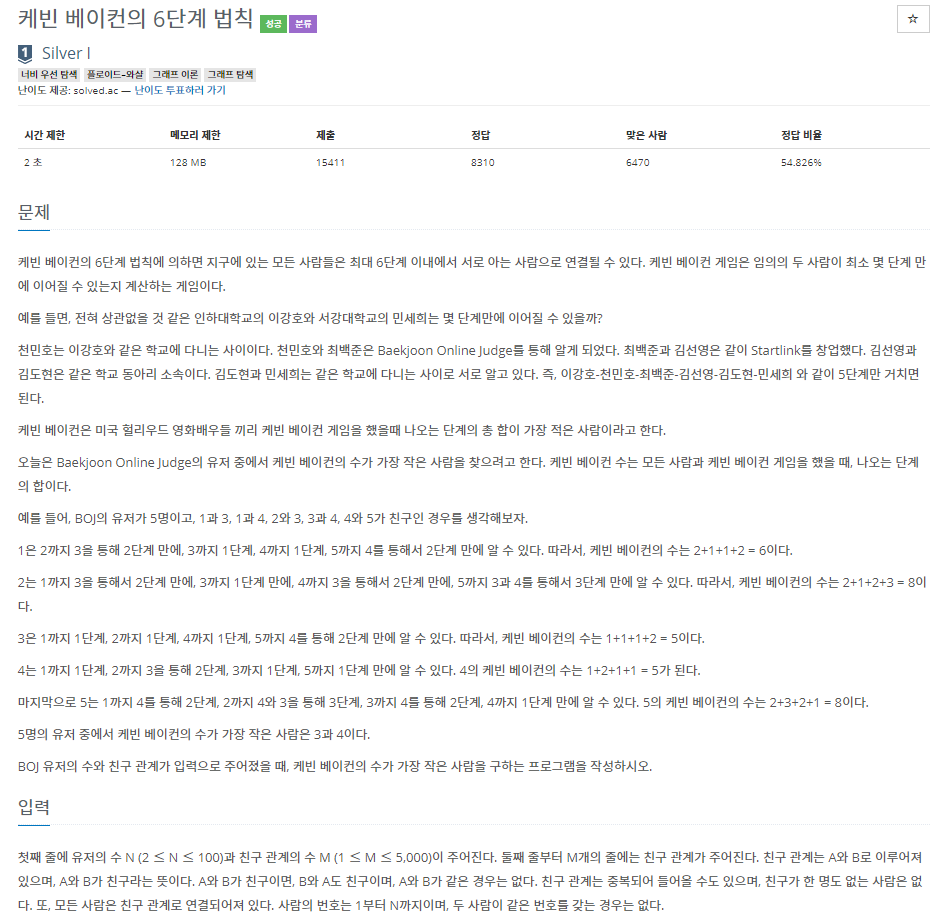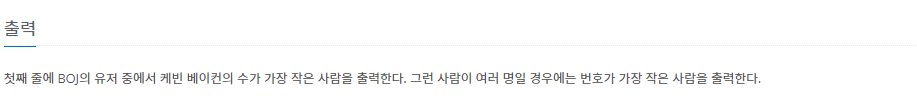

##1. BFS + DP 방법

In [ ]:
import sys
from collections import deque
input = sys.stdin.readline

def bfs(start):
  q = deque()
  dp = [0]*(n+1)
  q.append(start)
  visit[start] = True
  while q:
    node = q.popleft()
    for i in con[node]:
      if not visit[i]:
        q.append(i)
        visit[i] = True
        dp[i] = dp[node]+1
  return sum(dp)
        
n,m = map(int, input().split())
con = [[] for _ in range(n+1)]
res, _min = 0, n**2
for _ in range(m):
  a,b = map(int, input().split())
  con[a].append(b)
  con[b].append(a)
for i in range(1, n+1):
  visit = [False] * (n+1)
  val = bfs(i)
  if _min > val:
    _min = val
    res = i
print(res)

##2. 플로이드-워셜 방법

https://it-garden.tistory.com/247

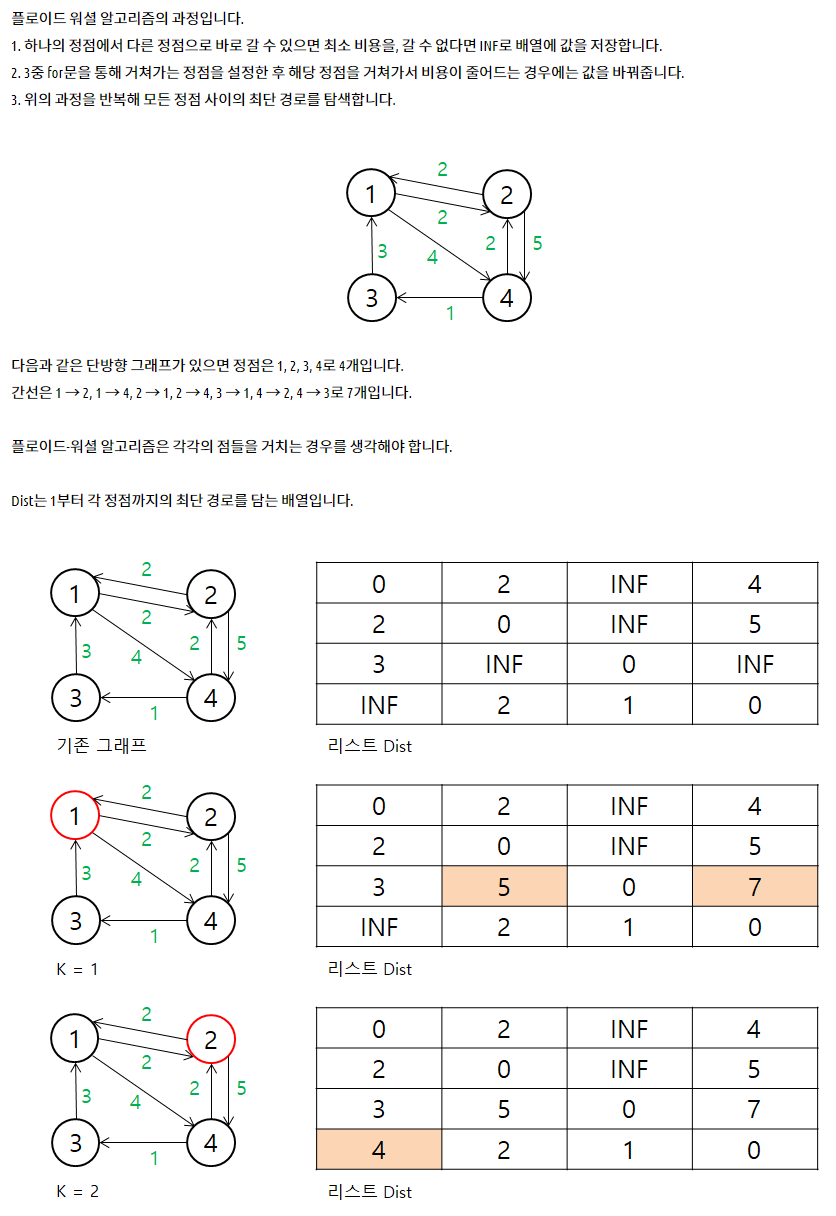

In [ ]:
import sys
input = sys.stdin.readline
INF = sys.maxsize

n,m = map(int, input().split())
dist = [[INF]*(n) for _ in range(n)]
_min, res = INF, 0

for _ in range(m):
  a,b = map(int, input().split())
  dist[a-1][b-1] = 1
  dist[b-1][a-1] = 1

for k in range(n): #거치는 점
  for i in range(n): #시작점
    for j in range(n): #끝점
      if i==j:
        dist[i][j] = 0
      else:
        dist[i][j] = min(dist[i][j], dist[i][k]+dist[k][j])
        
for i in range(n):
  if _min > sum(dist[i]):
    _min = sum(dist[i])
    res = i
    
print(res+1)

# 1463

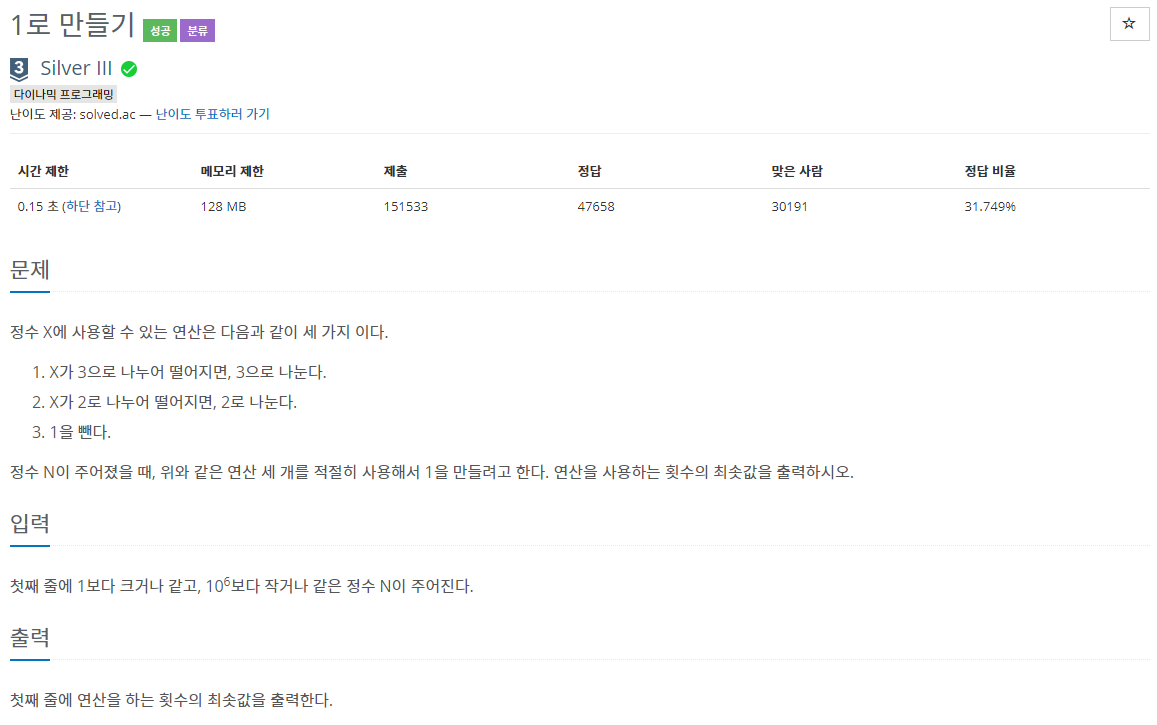

In [ ]:
n = int(input())
dp = [0]*1000001
dp[1] = 0

for i in range(2,n+1):
  dp[i] = dp[i-1]+1
  if i%3 == 0:
    dp[i] = min(dp[i],dp[i//3]+1)
  if i%2 == 0:
    dp[i] = min(dp[i],dp[i//2]+1)
    
print(dp[n])